In [8]:
import pickle as pkl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

path_dt = '/home/mateusz/Desktop/Demand-Forecast/baseline/results/DT_2024-7-22-11:23:22.pkl'

path_pruned = '/home/mateusz/Desktop/Demand-Forecast/baseline/results/PRUNED_2024-7-22-11:23:22.pkl'

path_forest = '/home/mateusz/Desktop/Demand-Forecast/baseline/results/FOREST_2024-7-22-11:23:22.pkl'

def get_data(path):
    data = pkl.load(open(path, 'rb'))
    stores = []
    skus = []
    rmses = []
    preds = []
    gts = []

    for key in data.keys():
        run = data[key]
        stores.append(key.split('_')[0])
        skus.append(key.split('_')[1])
        rmses.append(run['rmse_val'])
        preds.append(run['val'][1])
        gts.append(run['val'][0])

    stores_strip = list(set(stores))
    skus_strip = list(set(skus))
    return stores, stores_strip, skus, skus_strip, rmses, preds, gts, data

data_dt = get_data(path_dt)
data_pruned = get_data(path_pruned)
data_forest = get_data(path_forest)

In [9]:
def get_out_matrix(data):
    out_matrix = np.zeros((len(data[1]), len(data[3])))
    for i in range(len(data[1])):
        for k in range(len(data[3])):
            out_matrix[i][k] = data[-1][f'{data[1][i]}_{data[3][k]}']['rmse_val']
    return out_matrix


out_dt = get_out_matrix(data_dt)
out_pruned = get_out_matrix(data_pruned)
out_forest = get_out_matrix(data_forest)

In [10]:
def show_matrix(matrix, data):
    dims = (4.5, 8.27)
    plt.rcParams.update({'font.size': .81})
    sns.set(font_scale=.71)
    fig, ax = plt.subplots(figsize=dims)
    ax = sns.heatmap(matrix, xticklabels=data[3], yticklabels=data[1], square=True)
    ax.set_xlabel('SKU id')
    ax.set_ylabel('Store id')
    plt.title('RMSE for store-sku match')
    plt.tight_layout()
    plt.show()

Decision Trees out matrix:


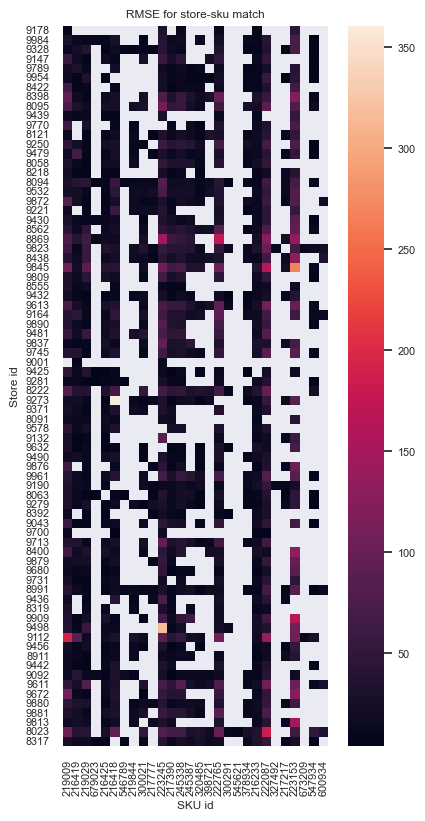

In [11]:
print(f'Decision Trees out matrix:')
show_matrix(out_dt, data_dt)

Decision Trees - pruned out matrix:


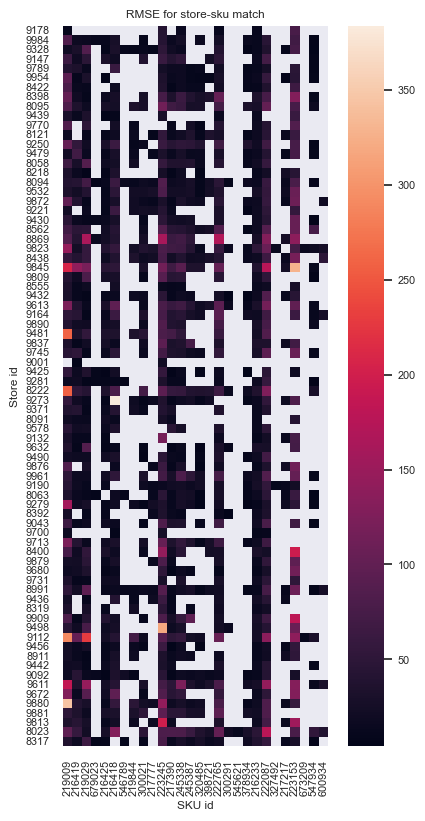

In [12]:
print(f'Decision Trees - pruned out matrix:')
show_matrix(out_pruned, data_pruned)

Random Forests out matrix:


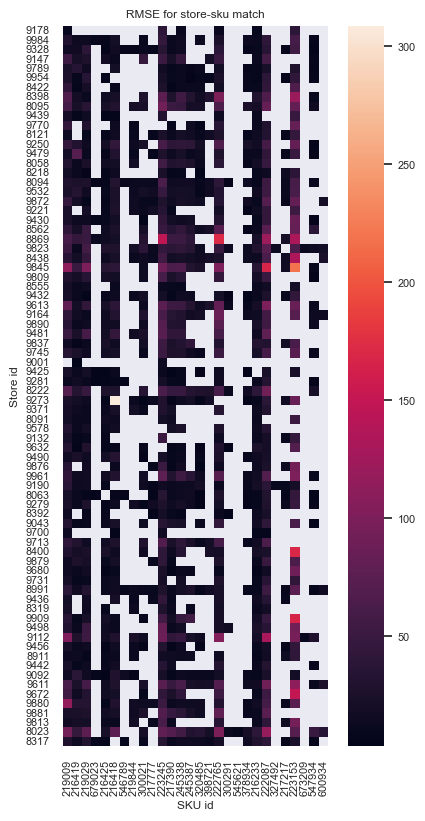

In [13]:
print(f'Random Forests out matrix:')
show_matrix(out_forest, data_forest)

In [14]:
def get_best(data):
    successful = np.where([x.size > 12 for x in data[-2] if type(x) is not float])[0]

    stores_s = [data[0][i] for i in successful]
    skus_s = [data[2][i] for i in successful]
    rmses_s = [data[-4][i] for i in successful]
    preds_s = [data[-3][i] for i in successful]
    gts_s = [data[-2][i] for i in successful]

    print('Lowest RMSE score')
    rmses_order = np.argsort(rmses_s)[:5]
    for ind in rmses_order:
        print(f'Store: {stores_s[ind]}, SKU: {skus_s[ind]}')
        plt.plot(preds_s[ind], label='preds')
        plt.plot(gts_s[ind], label='GT')
        plt.title(f'{stores_s[ind]}/{skus_s[ind]}, RMSE: {rmses_s[ind]}')
        plt.legend()
        plt.tight_layout()
        plt.show()


5 Best Decision Trees:
Lowest RMSE score
Store: 9425, SKU: 216425


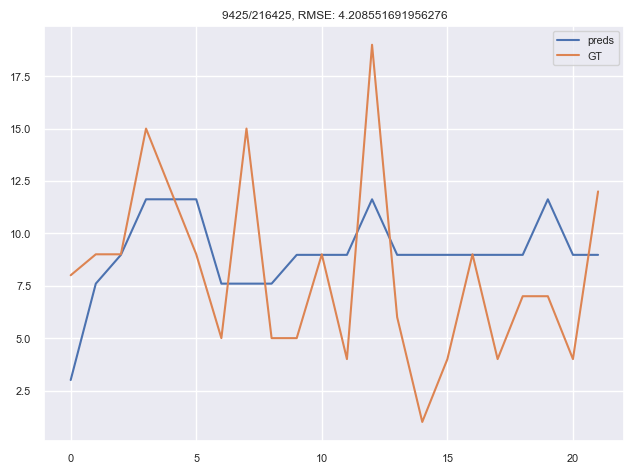

Store: 9954, SKU: 216425


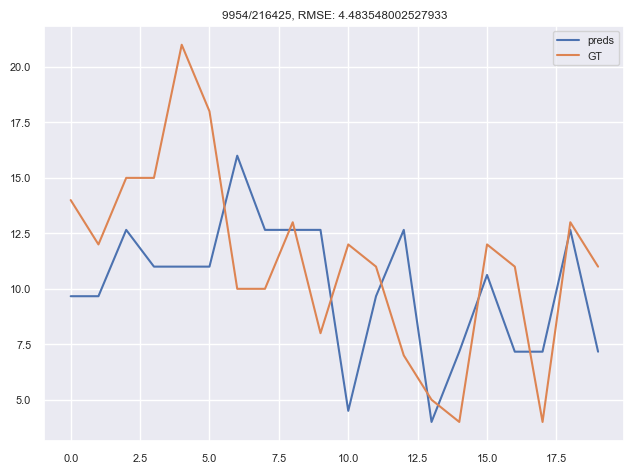

Store: 9680, SKU: 217390


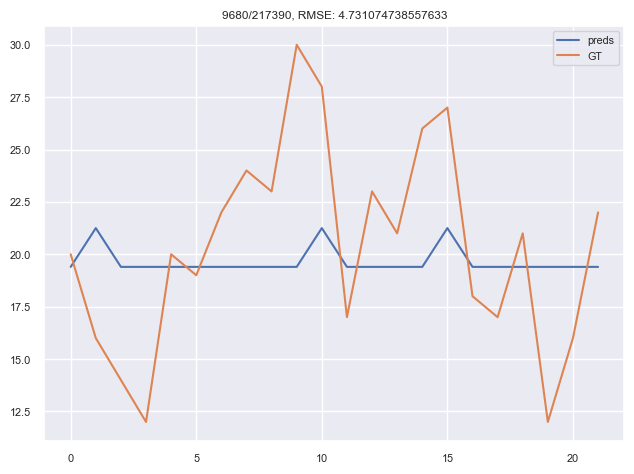

Store: 9680, SKU: 216425


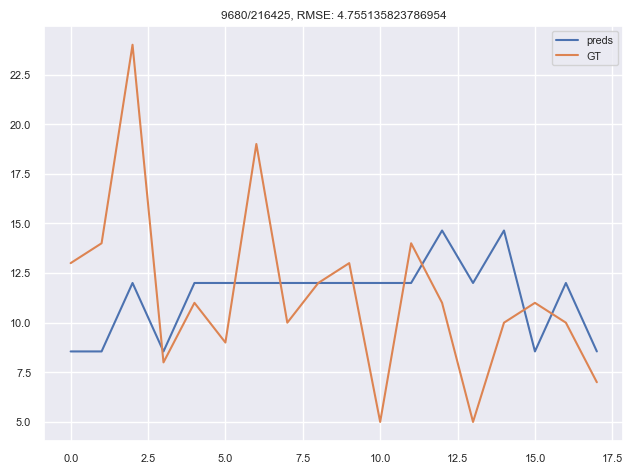

Store: 8218, SKU: 219029


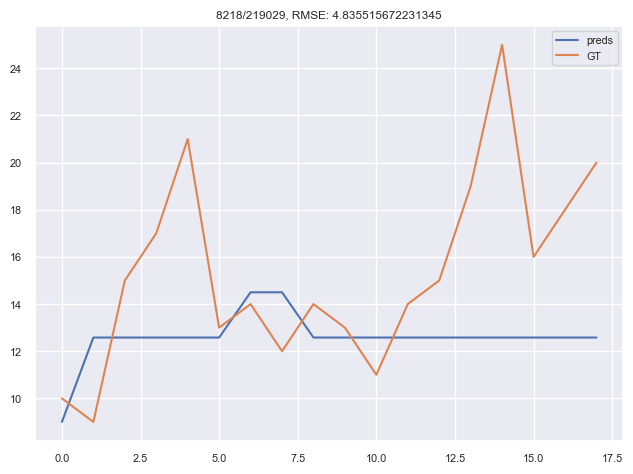

In [15]:
print(f'5 Best Decision Trees:')
get_best(data_dt)

5 Best Decision Trees - pruned:
Lowest RMSE score
Store: 9456, SKU: 217390


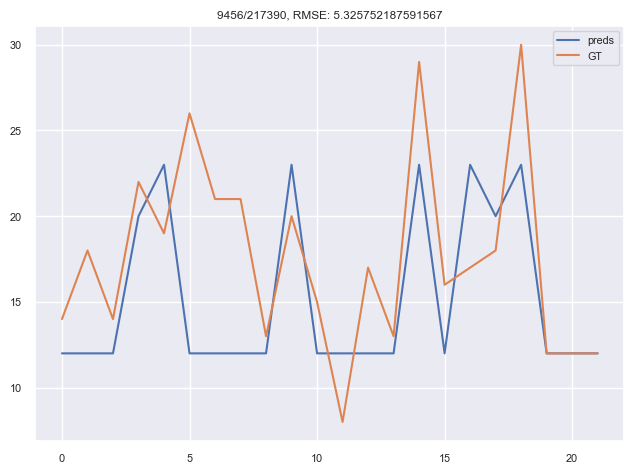

Store: 9680, SKU: 217390


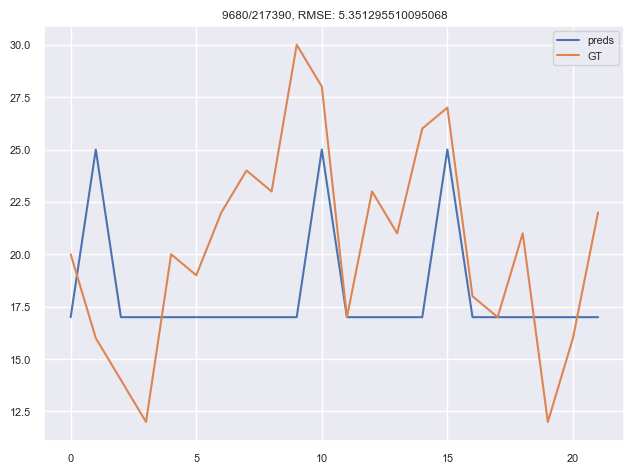

Store: 9954, SKU: 216425


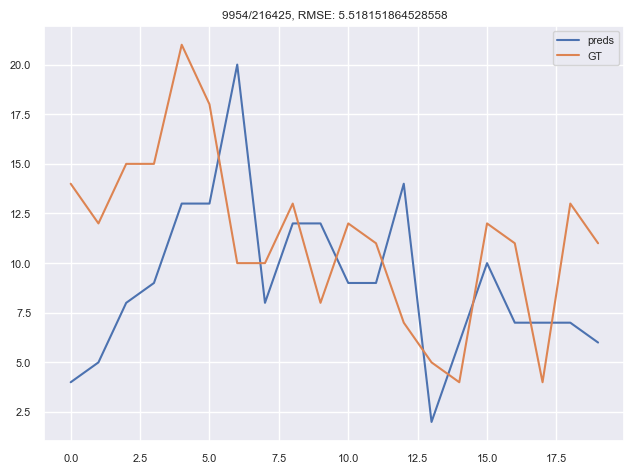

Store: 9439, SKU: 216425


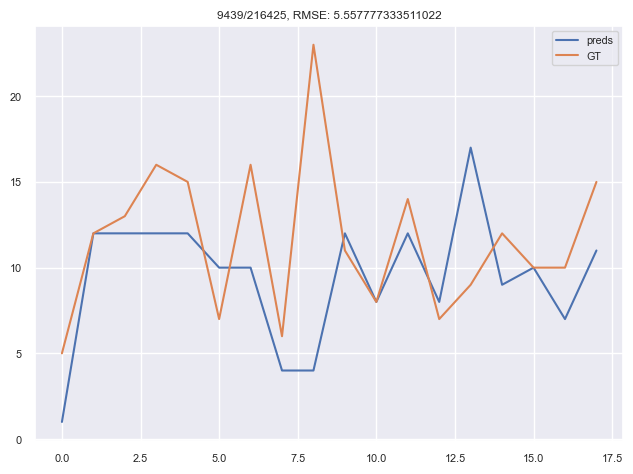

Store: 8218, SKU: 219029


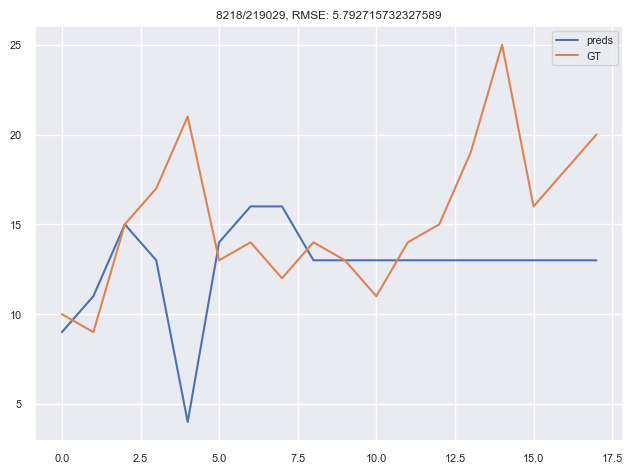

In [16]:
print(f'5 Best Decision Trees - pruned:')
get_best(data_pruned)

5 Best Random Forests:
Lowest RMSE score
Store: 9001, SKU: 216419


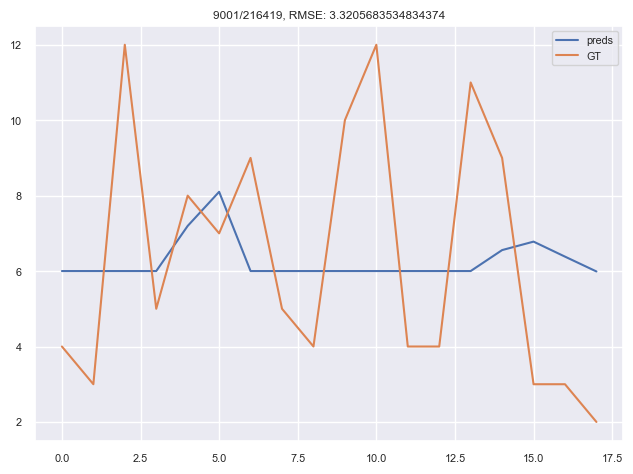

Store: 9954, SKU: 216425


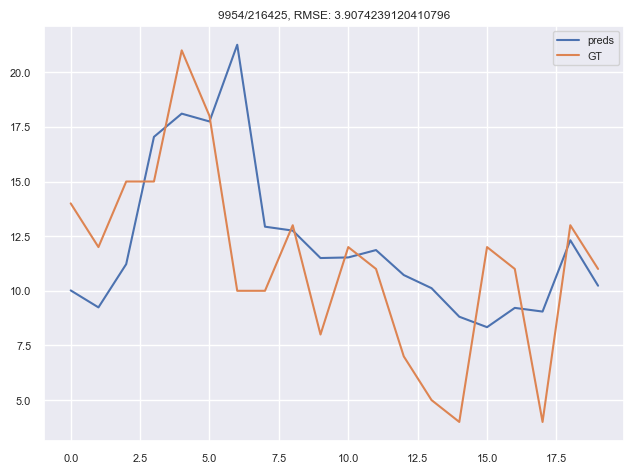

Store: 9425, SKU: 216425


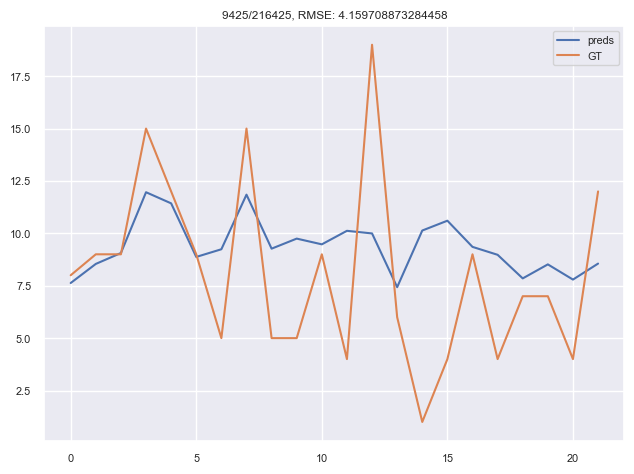

Store: 9439, SKU: 216425


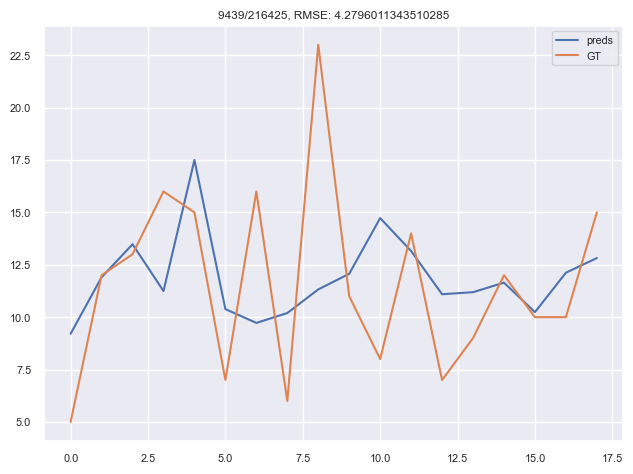

Store: 9425, SKU: 217390


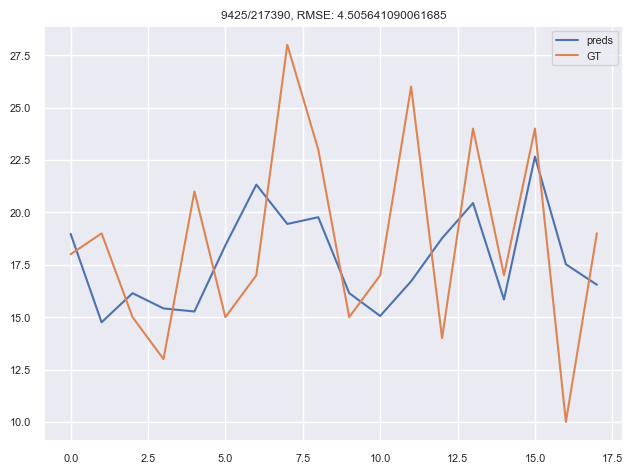

In [17]:
print(f'5 Best Random Forests:')
get_best(data_forest)

In [18]:
mean_dt = np.mean(out_dt[~np.isnan(out_dt)])
mean_pruned = np.mean(out_pruned[~np.isnan(out_pruned)])
mean_forest = np.mean(out_forest[~np.isnan(out_forest)])

print(f'Mean RMSE -- Decision tree: {mean_dt}')
print(f'Mean RMSE -- Decision tree, pruned: {mean_pruned}')
print(f'Mean RMSE -- Random Forest: {mean_forest}')

Mean RMSE -- Decision tree: 28.98011847705401
Mean RMSE -- Decision tree, pruned: 37.39974412632383
Mean RMSE -- Random Forest: 26.930157165693064
